In [77]:
import pandas as pd
import os

# **IEEE Dataset 1**

In [78]:
csv_files = [
  '/content/drive/MyDrive/Health Sensor Data NSUT/Health Sensor Data NSUT/D1.csv',
  '/content/drive/MyDrive/Health Sensor Data NSUT/Health Sensor Data NSUT/D2.csv',
  '/content/drive/MyDrive/Health Sensor Data NSUT/Health Sensor Data NSUT/D3.csv',
  '/content/drive/MyDrive/Health Sensor Data NSUT/Health Sensor Data NSUT/D4.csv',
  '/content/drive/MyDrive/Health Sensor Data NSUT/Health Sensor Data NSUT/D5.csv',
  '/content/drive/MyDrive/Health Sensor Data NSUT/Health Sensor Data NSUT/D6.csv',
  '/content/drive/MyDrive/Health Sensor Data NSUT/Health Sensor Data NSUT/D7.csv',
  '/content/drive/MyDrive/Health Sensor Data NSUT/Health Sensor Data NSUT/D8.csv',
  '/content/drive/MyDrive/Health Sensor Data NSUT/Health Sensor Data NSUT/D9.csv',
  '/content/drive/MyDrive/Health Sensor Data NSUT/Health Sensor Data NSUT/N1.csv',
  '/content/drive/MyDrive/Health Sensor Data NSUT/Health Sensor Data NSUT/N2.csv',
  '/content/drive/MyDrive/Health Sensor Data NSUT/Health Sensor Data NSUT/N3.csv',
  '/content/drive/MyDrive/Health Sensor Data NSUT/Health Sensor Data NSUT/N4.csv',
  '/content/drive/MyDrive/Health Sensor Data NSUT/Health Sensor Data NSUT/N5.csv',
  '/content/drive/MyDrive/Health Sensor Data NSUT/Health Sensor Data NSUT/N6.csv',
  '/content/drive/MyDrive/Health Sensor Data NSUT/Health Sensor Data NSUT/N7.csv',
  '/content/drive/MyDrive/Health Sensor Data NSUT/Health Sensor Data NSUT/N8.csv',
  '/content/drive/MyDrive/Health Sensor Data NSUT/Health Sensor Data NSUT/N9.csv',
  '/content/drive/MyDrive/Health Sensor Data NSUT/Health Sensor Data NSUT/N10.csv',
  '/content/drive/MyDrive/Health Sensor Data NSUT/Health Sensor Data NSUT/N11.csv',
  '/content/drive/MyDrive/Health Sensor Data NSUT/Health Sensor Data NSUT/N12.csv',
]

In [79]:
df = pd.concat([pd.read_csv(file, header = None) for file in csv_files], ignore_index = True)

In [80]:
df.shape

(7384, 6)

In [81]:
df.head()

,0,1,2,3,4,5
0,499,35,116,93,1,NaN
1,543,37,120,93,1,NaN
2,496,35,115,93,1,NaN
3,654,40,99,92,1,NaN
4,667,39,95,92,1,NaN


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7384 entries, 0 to 7383
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       7384 non-null   int64  
 1   1       7384 non-null   int64  
 2   2       7384 non-null   int64  
 3   3       7384 non-null   int64  
 4   4       7384 non-null   int64  
 5   5       0 non-null      float64
dtypes: float64(1), int64(5)
memory usage: 346.3 KB


In [83]:
df.columns

Index([0, 1, 2, 3, 4, 5], dtype='int64')

In [84]:
df.columns = ['acc_x','temp_celsius','pulse_bpm','spo2_pctage', 'mdd', 'null']
df.head()

,acc_x,temp_celsius,pulse_bpm,spo2_pctage,mdd,null
0,499,35,116,93,1,NaN
1,543,37,120,93,1,NaN
2,496,35,115,93,1,NaN
3,654,40,99,92,1,NaN
4,667,39,95,92,1,NaN


In [85]:
df.drop(columns = ['null'], inplace = True)
df.head()

,acc_x,temp_celsius,pulse_bpm,spo2_pctage,mdd
0,499,35,116,93,1
1,543,37,120,93,1
2,496,35,115,93,1
3,654,40,99,92,1
4,667,39,95,92,1


In [86]:
df.shape

(7384, 5)

In [87]:
df.to_csv('IEEE Merged dataset.csv', index = False)

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7384 entries, 0 to 7383
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   acc_x         7384 non-null   int64
 1   temp_celsius  7384 non-null   int64
 2   pulse_bpm     7384 non-null   int64
 3   spo2_pctage   7384 non-null   int64
 4   mdd           7384 non-null   int64
dtypes: int64(5)
memory usage: 288.6 KB


In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

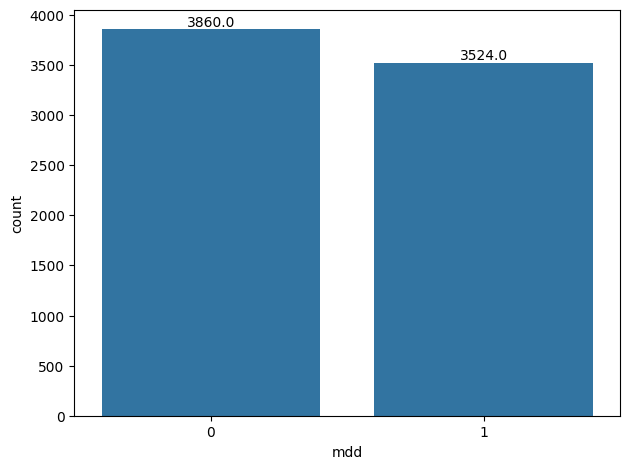

In [90]:
ax = sns.countplot(data = df, x = 'mdd')

# Add count labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        f'{height}',
        (p.get_x() + p.get_width() / 2., height),
        ha='center', va='bottom', fontsize=10, color='black'
    )

# Optional: improve layout
plt.tight_layout()
plt.show()

In [91]:
import numpy as np

def create_sequences(df, seq_len=30):
    X, y = [], []
    data = df[['acc_x','temp_celsius','pulse_bpm','spo2_pctage']].values
    labels = df['mdd'].values
    for i in range(len(data) - seq_len):
        X.append(data[i:i+seq_len])
        y.append(labels[i+seq_len])
    return np.array(X), np.array(y)

X, y = create_sequences(df, seq_len=30)  # using 30‑step windows

In [92]:
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import class_weight

le = LabelEncoder()
y_enc = le.fit_transform(y)
class_weights = dict(enumerate(class_weight.compute_class_weight('balanced',
                                                classes=np.unique(y_enc),
                                                y=y_enc)))

In [93]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense, Bidirectional, Dropout

model = Sequential([
    Bidirectional(LSTM(64, return_sequences=False), input_shape=(X.shape[1], X.shape[2])),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(len(le.classes_), activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_3 (Bidirectional) │ (None, 128)            │        35,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 39,522 (154.38 KB)

 Trainable params: 39,522 (154.38 KB)

 Non-trainable params: 0 (0.00 B)

In [94]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y_enc, test_size=0.2, stratify=y_enc, random_state=42)
history = model.fit(X_train, y_train,
          validation_data=(X_val, y_val),
          epochs=30,
          batch_size=64,
          class_weight=class_weights)

Epoch 1/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - accuracy: 0.5371 - loss: 0.7241 - val_accuracy: 0.6200 - val_loss: 0.6725
Epoch 2/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.5659 - loss: 0.6796 - val_accuracy: 0.5241 - val_loss: 0.6760
Epoch 3/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.5941 - loss: 0.6610 - val_accuracy: 0.6730 - val_loss: 0.6161
Epoch 4/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.6510 - loss: 0.6324 - val_accuracy: 0.6948 - val_loss: 0.5972
Epoch 5/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.6735 - loss: 0.6131 - val_accuracy: 0.7124 - val_loss: 0.5672
Epoch 6/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.6847 - loss: 0.6005 - val_accuracy: 0.7179 - val_loss: 0.5496
Epoch 7/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.6929 - loss: 0.5929 - val_accuracy: 0.7682 - val_loss: 0.5057
Epoch 8/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.7145 - loss: 0.5696 - val_accuracy: 0.7716 - v

In [95]:
loss, acc = model.evaluate(X_val, y_val)
print(f'Validation accuracy: {acc:.2%}')

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9183 - loss: 0.2334
Validation accuracy: 92.32%


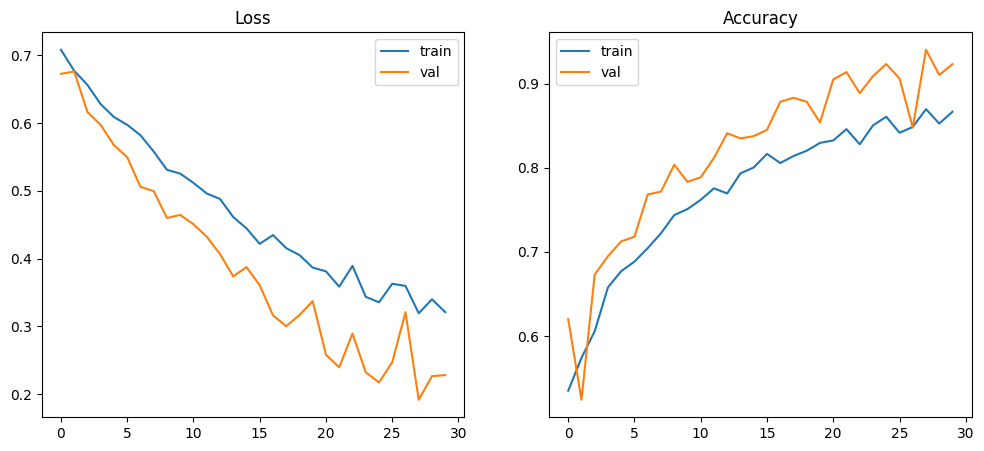

In [96]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.title('Accuracy')
plt.legend()

In [97]:
model.save('mdd_lstm.h5')

In [ ]:
# To predict:
#preds = model.predict(X_new)  # X_new shape: (n_samples, seq_len, 4)
#pred_labels = le.inverse_transform(preds.argmax(axis=1))